In [77]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import scipy.stats as stats
import seaborn as sns
from scipy.stats import pointbiserialr
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC,LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from scipy.stats import boxcox
import plotly as py
import plotly.graph_objs as go

In [78]:
df=pd.read_csv('online_shoppers_intention.csv')
df.shape

(12330, 18)

In [79]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [80]:
#calculating the number of unique values in each column and storing it in a list
no_of_diffele=[]
unique_value_array=[]
for col in df:
    no_of_diffele.append(len(df[col].unique()))
    unique_value_array.append(list(df[col].unique()))

In [81]:
no_of_null=df.isnull().sum()
percent_missing=df.isnull().sum()*100/len(df)

In [82]:
missing_value_df=pd.DataFrame({'no_of_diffele':no_of_diffele,'unique_value_array':unique_value_array})

In [83]:
missing_value_df

,no_of_diffele,unique_value_array
0,27,"[0, 1, 2, 4, 12, 3, 10, 6, 5, 9, 8, 16, 13, 11..."
1,3335,"[0.0, 53.0, 64.6, 6.0, 18.0, 9.0, 56.0, 16.0, ..."
2,17,"[0, 1, 2, 4, 16, 5, 3, 14, 6, 12, 7, 9, 10, 8,..."
3,1258,"[0.0, 120.0, 16.0, 94.0, 93.0, 75.0, 19.0, 22...."
4,311,"[1, 2, 10, 19, 0, 3, 16, 7, 6, 23, 13, 20, 8, ..."
5,9551,"[0.0, 64.0, 2.666666667, 627.5, 154.2166667, 3..."
6,1872,"[0.2, 0.0, 0.05, 0.02, 0.015789474, 0.01875, 0..."
7,4777,"[0.2, 0.1, 0.14, 0.05, 0.024561404, 0.02222222..."
8,2704,"[0.0, 54.17976426, 19.44707913, 38.30849268, 2..."
9,6,"[0.0, 0.4, 0.8, 1.0, 0.2, 0.6]"


In [84]:
df_created=pd.DataFrame()
df_created['No. of missing elements']=list(no_of_null)
df_created['% of missing']=list(percent_missing)
df_created['No. of unique']=missing_value_df['no_of_diffele']
df_created['Unique Values']=missing_value_df['unique_value_array']

In [85]:
df_created

,No. of missing elements,% of missing,No. of unique,Unique Values
0,0,0.0,27,"[0, 1, 2, 4, 12, 3, 10, 6, 5, 9, 8, 16, 13, 11..."
1,0,0.0,3335,"[0.0, 53.0, 64.6, 6.0, 18.0, 9.0, 56.0, 16.0, ..."
2,0,0.0,17,"[0, 1, 2, 4, 16, 5, 3, 14, 6, 12, 7, 9, 10, 8,..."
3,0,0.0,1258,"[0.0, 120.0, 16.0, 94.0, 93.0, 75.0, 19.0, 22...."
4,0,0.0,311,"[1, 2, 10, 19, 0, 3, 16, 7, 6, 23, 13, 20, 8, ..."
5,0,0.0,9551,"[0.0, 64.0, 2.666666667, 627.5, 154.2166667, 3..."
6,0,0.0,1872,"[0.2, 0.0, 0.05, 0.02, 0.015789474, 0.01875, 0..."
7,0,0.0,4777,"[0.2, 0.1, 0.14, 0.05, 0.024561404, 0.02222222..."
8,0,0.0,2704,"[0.0, 54.17976426, 19.44707913, 38.30849268, 2..."
9,0,0.0,6,"[0.0, 0.4, 0.8, 1.0, 0.2, 0.6]"


In [86]:
print("Number of Duplicate Records-",df[df.duplicated()].shape[0])
df=df.drop_duplicates().reset_index(drop=True)
df.shape

Number of Duplicate Records- 125


(12205, 18)

In [87]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [88]:
numerical_features=['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated', 'ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
categorical_features=['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Revenue']

Numerical Data

In [89]:
df.loc[:,numerical_features]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
12200,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0
12201,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0
12202,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0
12203,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0


Categorical Data

In [90]:
df.loc[:,categorical_features]

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,Feb,1,1,1,1,Returning_Visitor,False,False
1,Feb,2,2,1,2,Returning_Visitor,False,False
2,Feb,4,1,9,3,Returning_Visitor,False,False
3,Feb,3,2,2,4,Returning_Visitor,False,False
4,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...
12200,Dec,4,6,1,1,Returning_Visitor,True,False
12201,Nov,3,2,1,8,Returning_Visitor,True,False
12202,Nov,3,2,1,13,Returning_Visitor,True,False
12203,Nov,2,2,3,11,Returning_Visitor,False,False


<AxesSubplot: xlabel='Weekend', ylabel='count'>

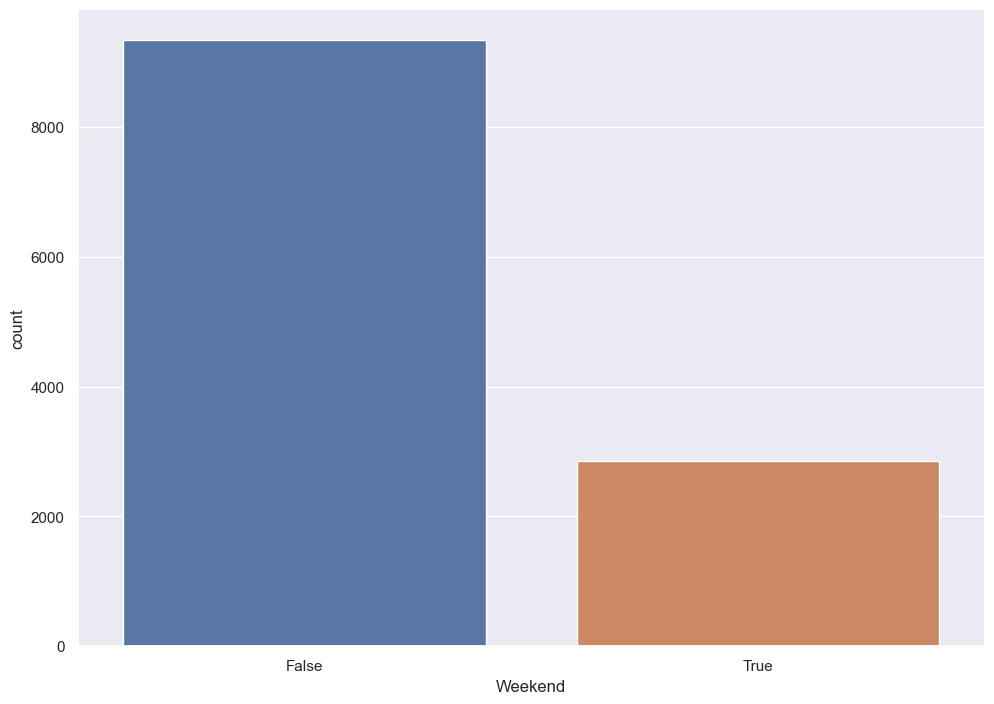

In [91]:
sns.set_theme(style="darkgrid")
sns.countplot(x = df['Weekend'])

In [92]:
a1=[2,1,3,4,8,6,7,5]
a2=[6601,2585,2555,478,79,19,7,6]
df['OperatingSystems'].value_counts()
import plotly.express as px
fig=go.Figure(data=[go.Pie(labels=a1,values=a2,title='Percentage of Different OS Used')])
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.show()


In [93]:
b1=[2,1,4,5,6,10,8,3,13,7,12,11,9]
b2=[7961,2462,736,467,174,163,135,105,61,49,10,6,6,1]
import plotly.express as px
fig=go.Figure(data=[go.Pie(labels=b1,values=b2,title='Percentage of Different Browsers' )])
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.show()


In [94]:
c1=[1,3,4,2,6,7,9,8,5]
c2=[4780,2403,1182,1136,805,761,511,434,318]
import plotly.express as px
fig=go.Figure(data=[go.Pie(labels=c1,values=c2,title='Percentage of Different Regions' )]) 
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.show()

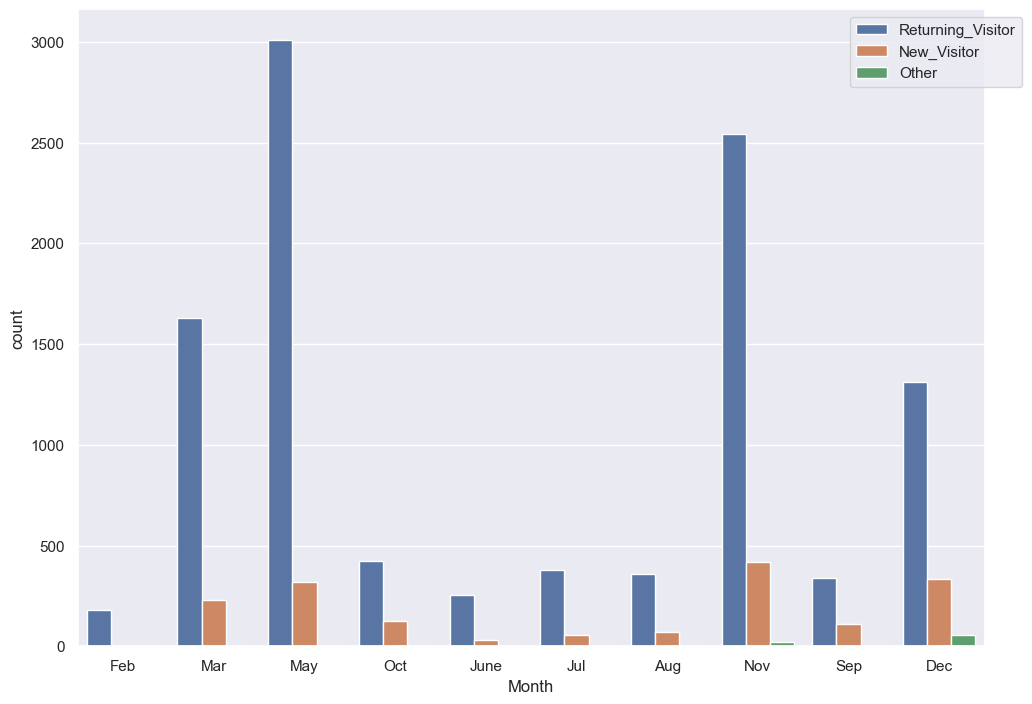

In [95]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="darkgrid")
sns.countplot(x=df['Month'],hue=df['VisitorType'])
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()


For Administrative Feature
	MannwhitneyuResult(statistic=12257665.5, pvalue=8.904562661815607e-74)
Point Biseral Test Result
	PointbiserialrResult(correlation=0.13632989781270502, pvalue=1.0213483852240272e-51)
For Administrative_Duration Feature
	MannwhitneyuResult(statistic=12193811.0, pvalue=2.2200306664424856e-70)
Point Biseral Test Result
	PointbiserialrResult(correlation=0.09176750270471673, pvalue=3.0361856304525184e-24)
For Informational Feature
	MannwhitneyuResult(statistic=11078871.5, pvalue=4.365437774939066e-35)
Point Biseral Test Result
	PointbiserialrResult(correlation=0.09362606354294116, pvalue=3.571243772969025e-25)
For Informational_Duration Feature
	MannwhitneyuResult(statistic=11018964.5, pvalue=4.053184619781425e-34)
Point Biseral Test Result
	PointbiserialrResult(correlation=0.06935752666721821, pvalue=1.7091065834494382e-14)
For ProductRelated Feature
	MannwhitneyuResult(statistic=12856227.0, pvalue=3.693607860403177e-102)
Point Biseral Test Result
	Pointbiserial

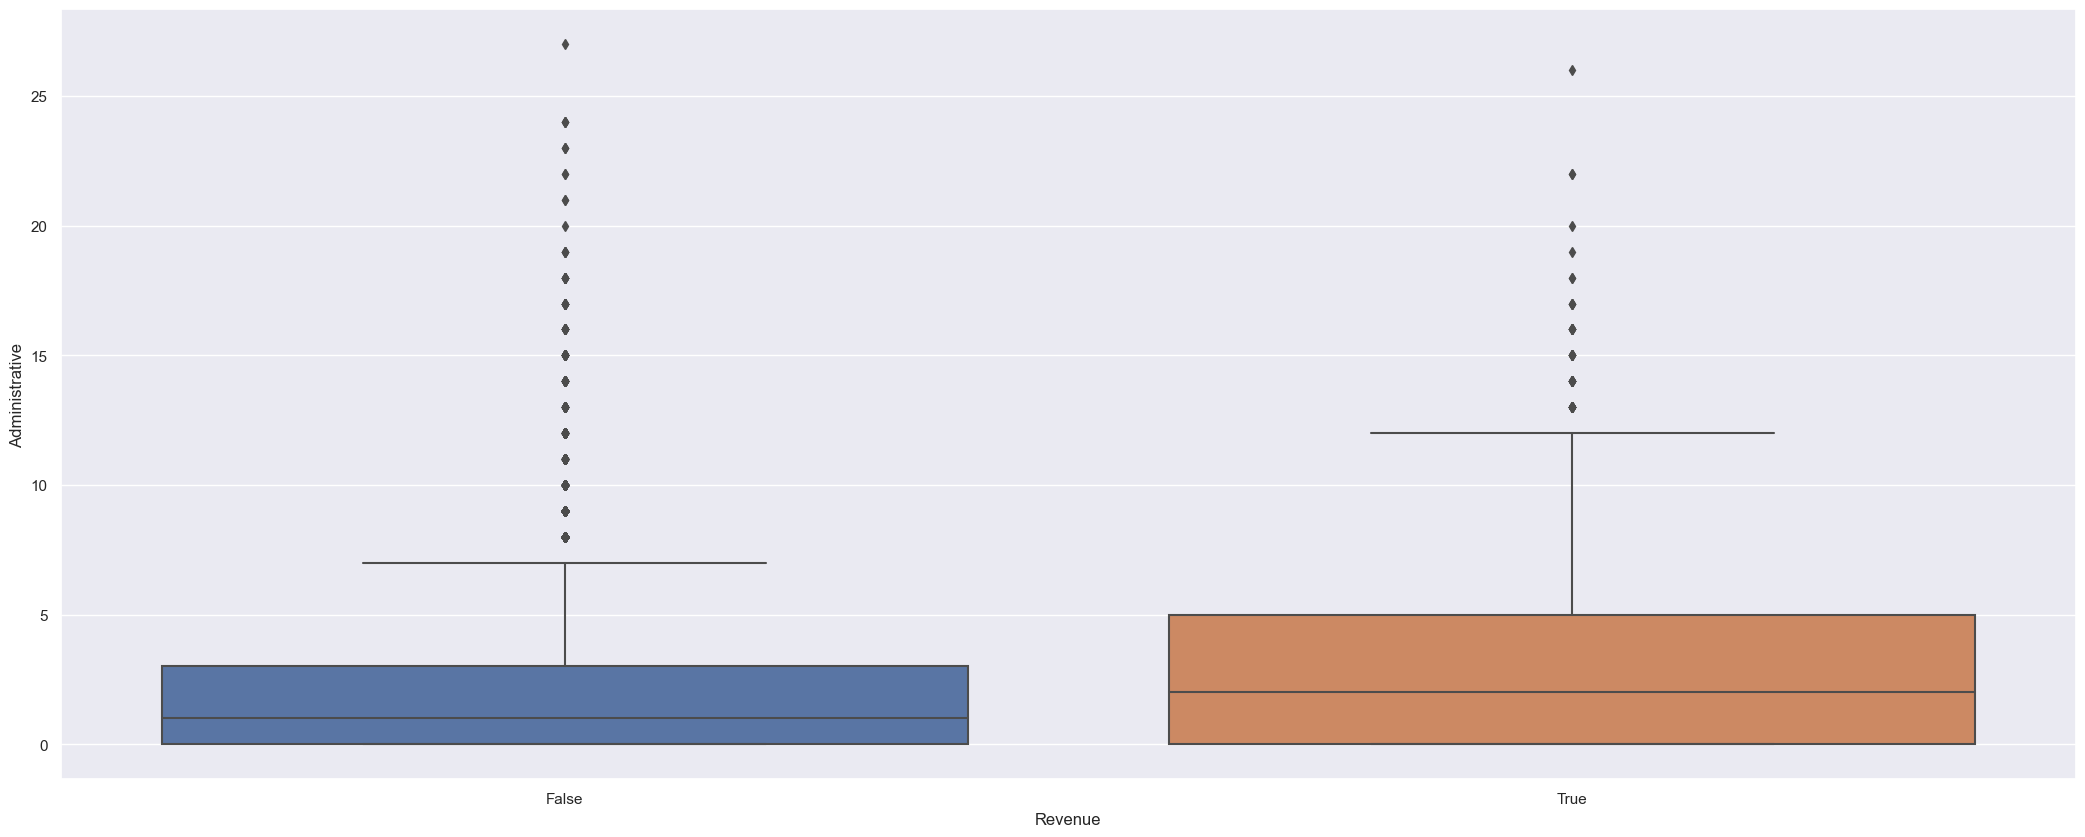

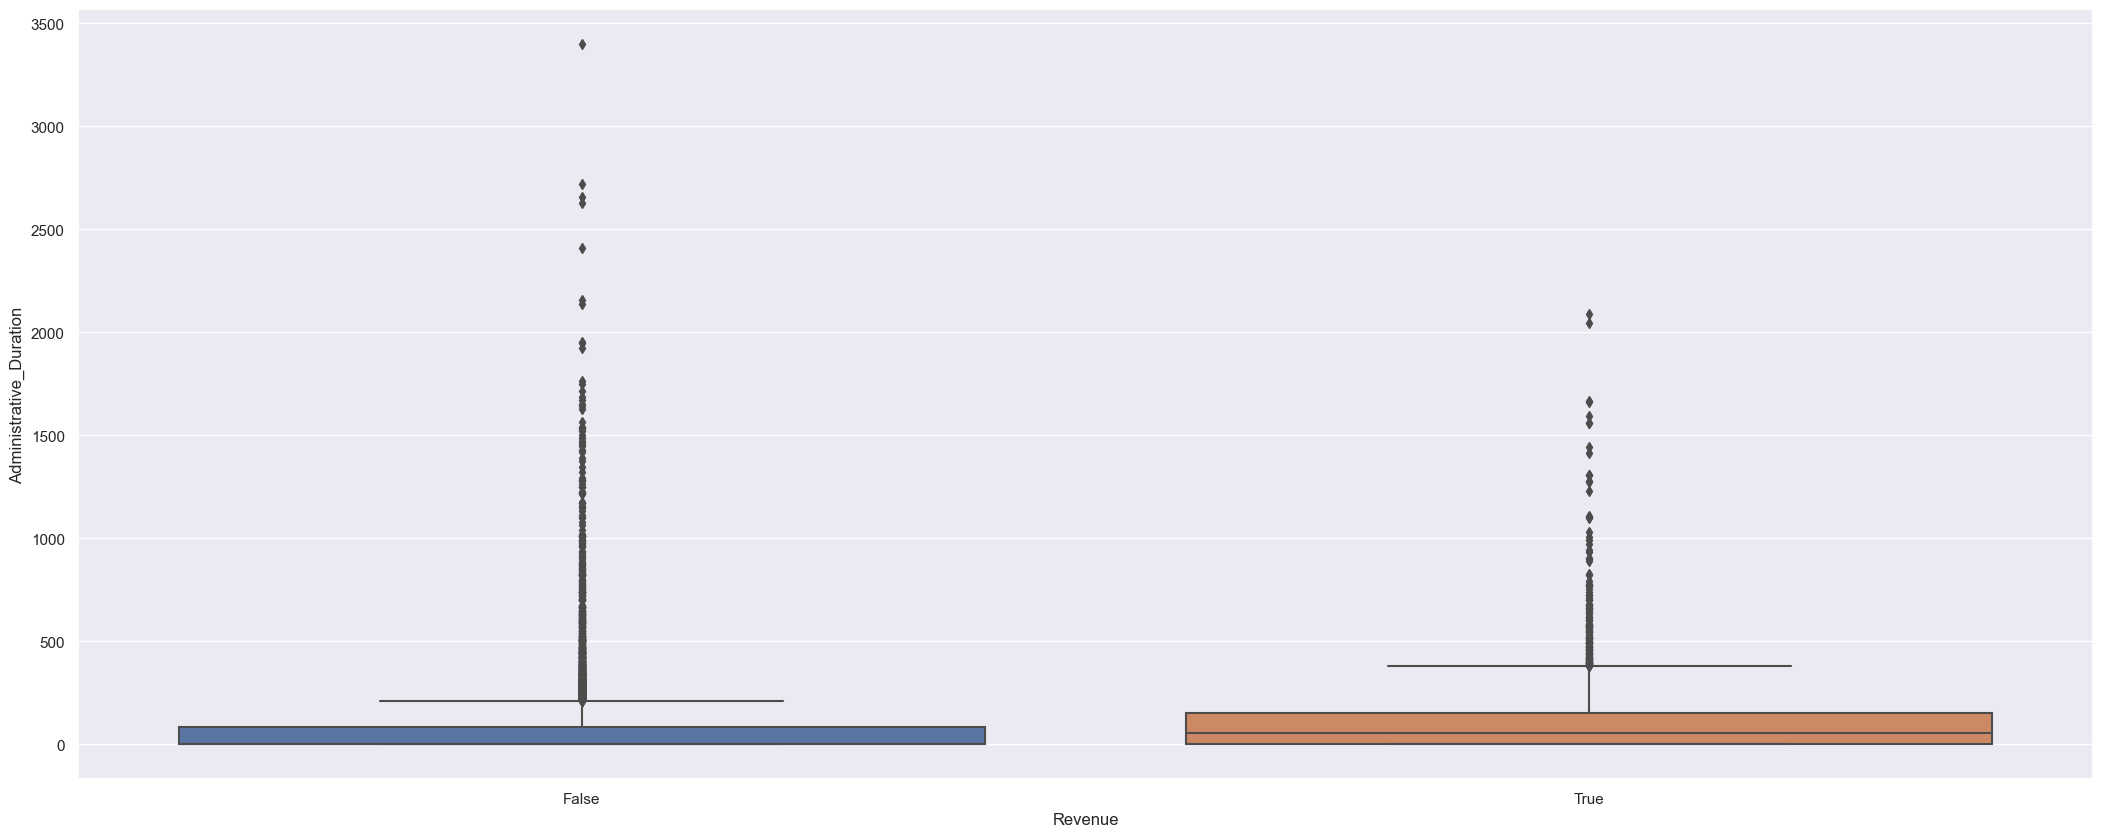

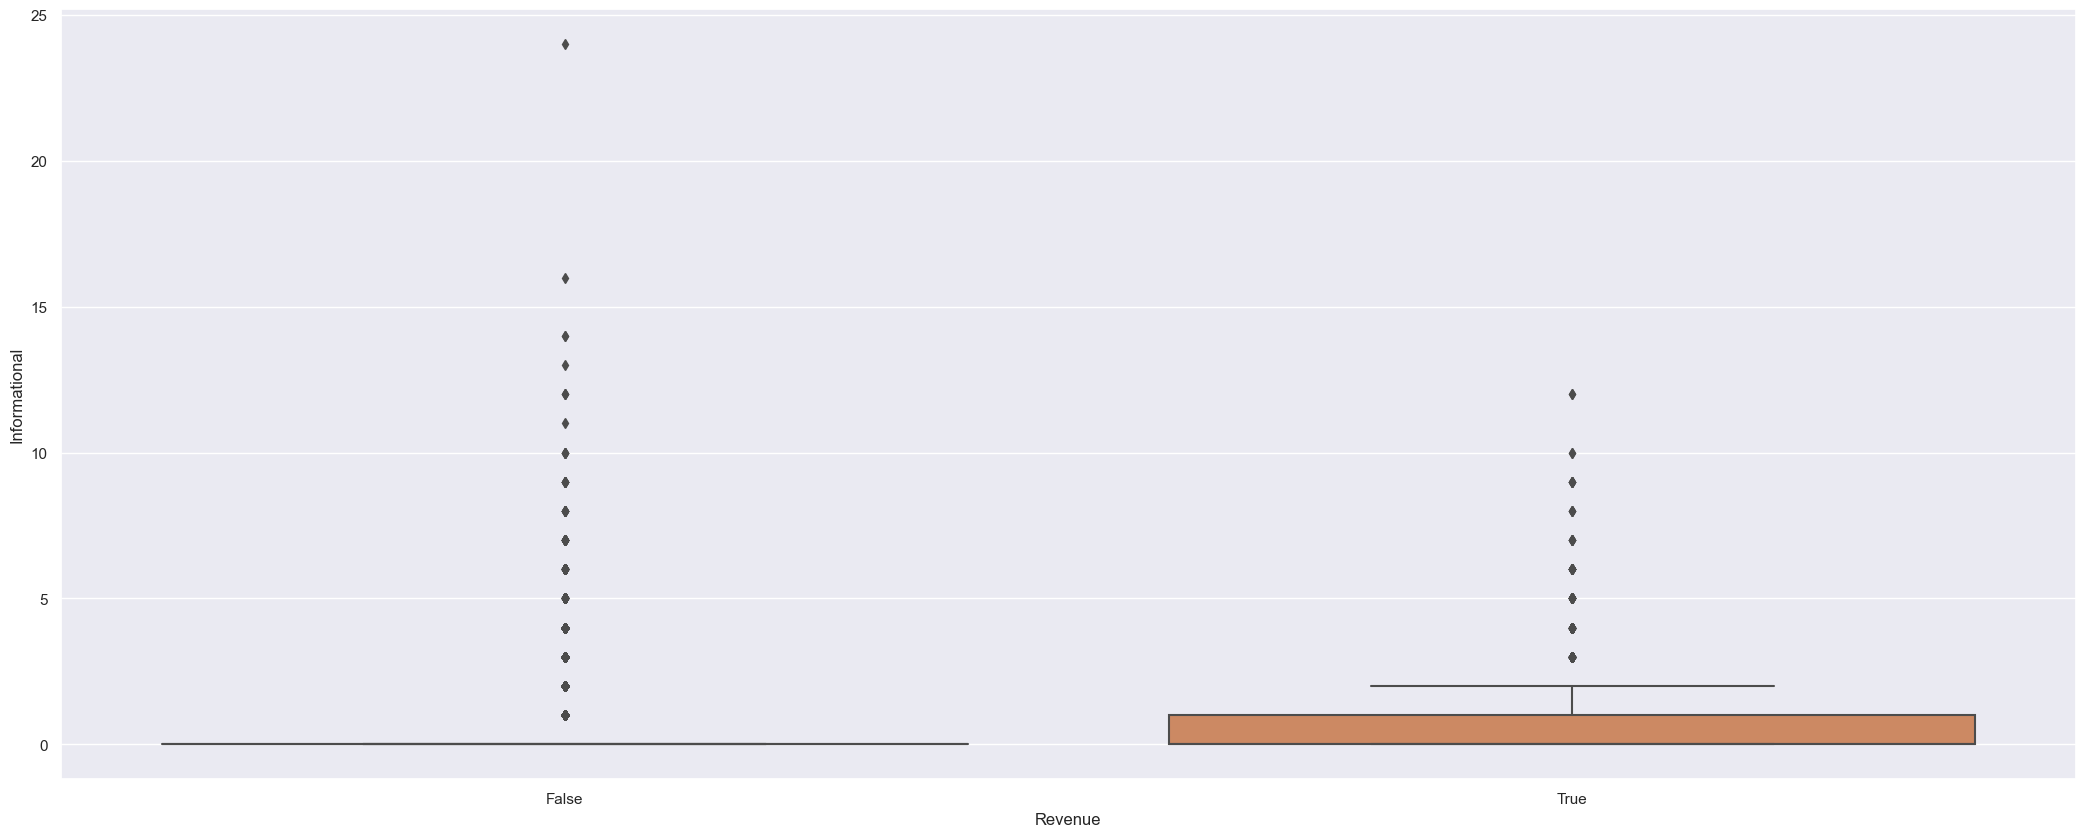

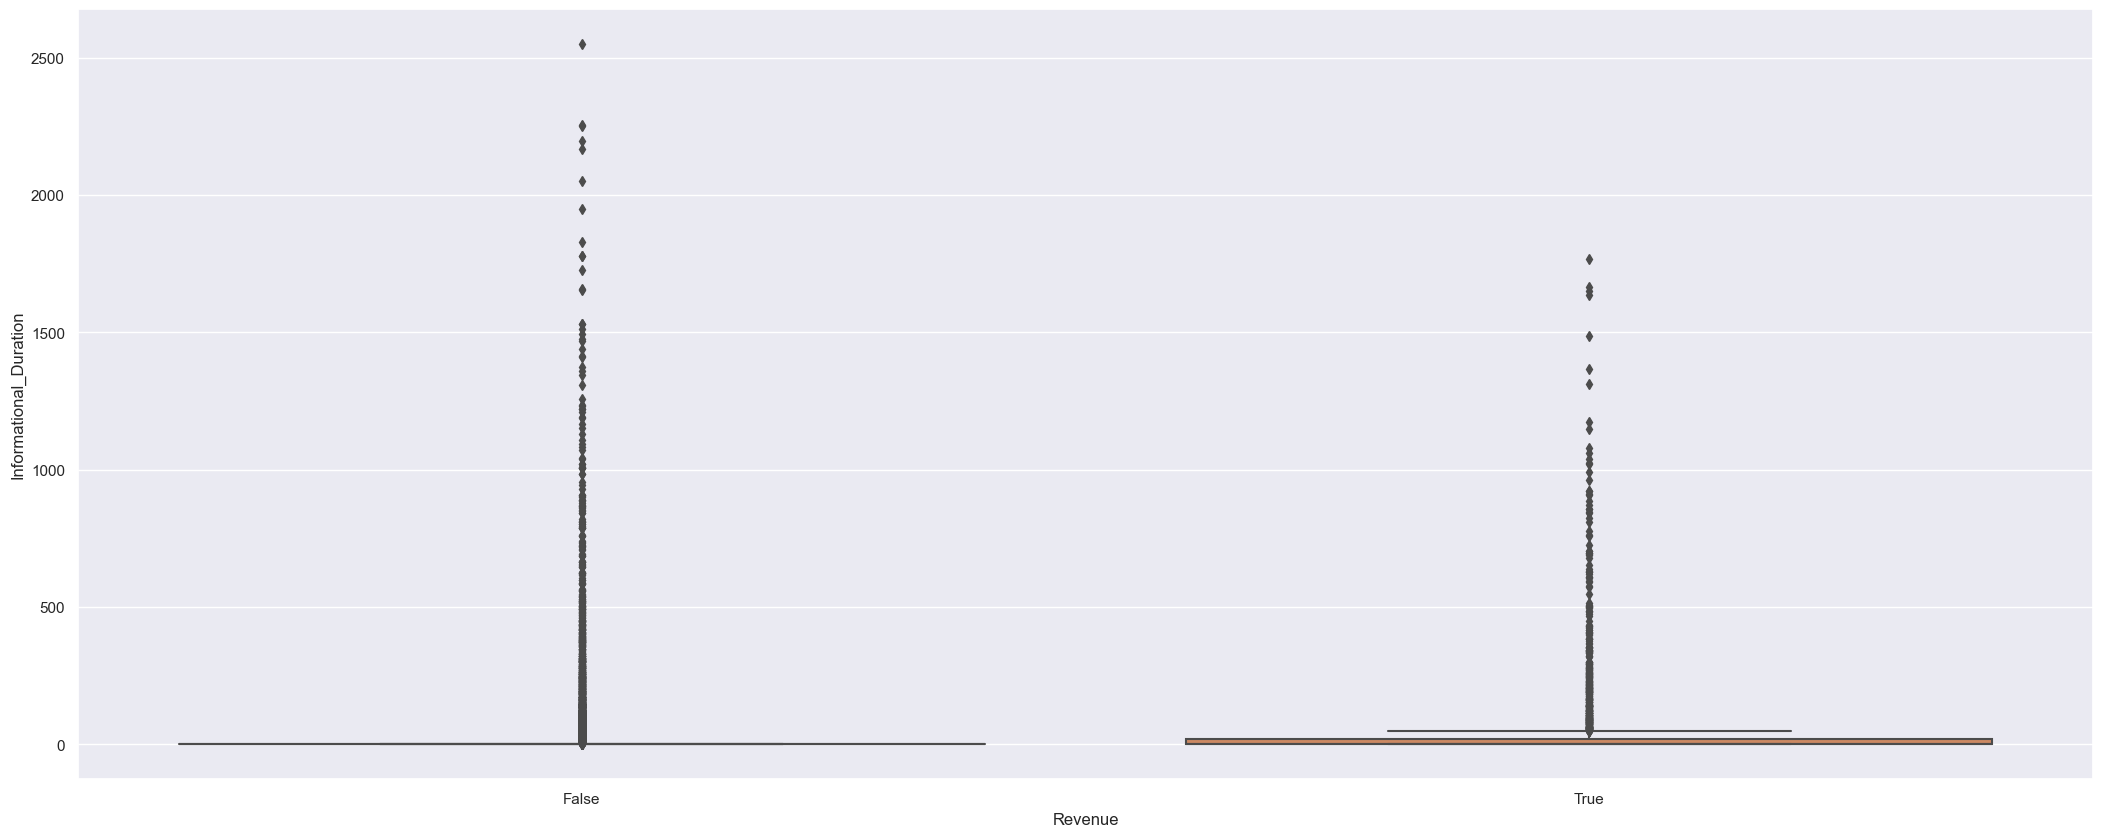

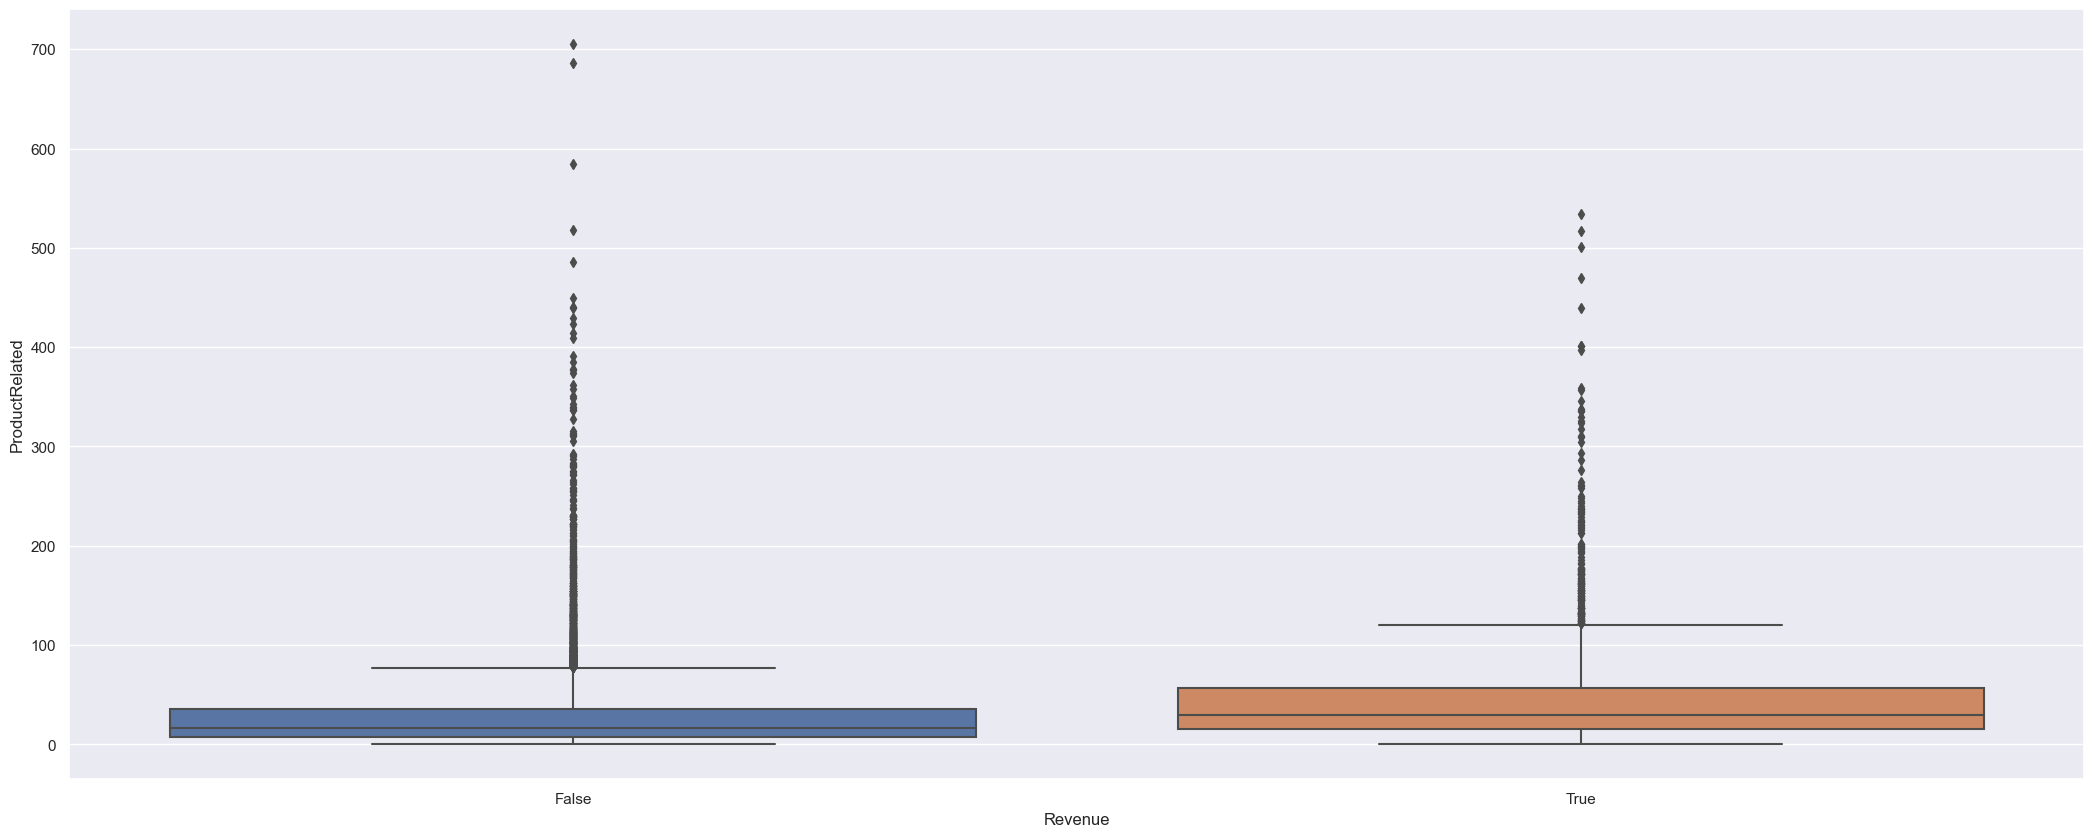

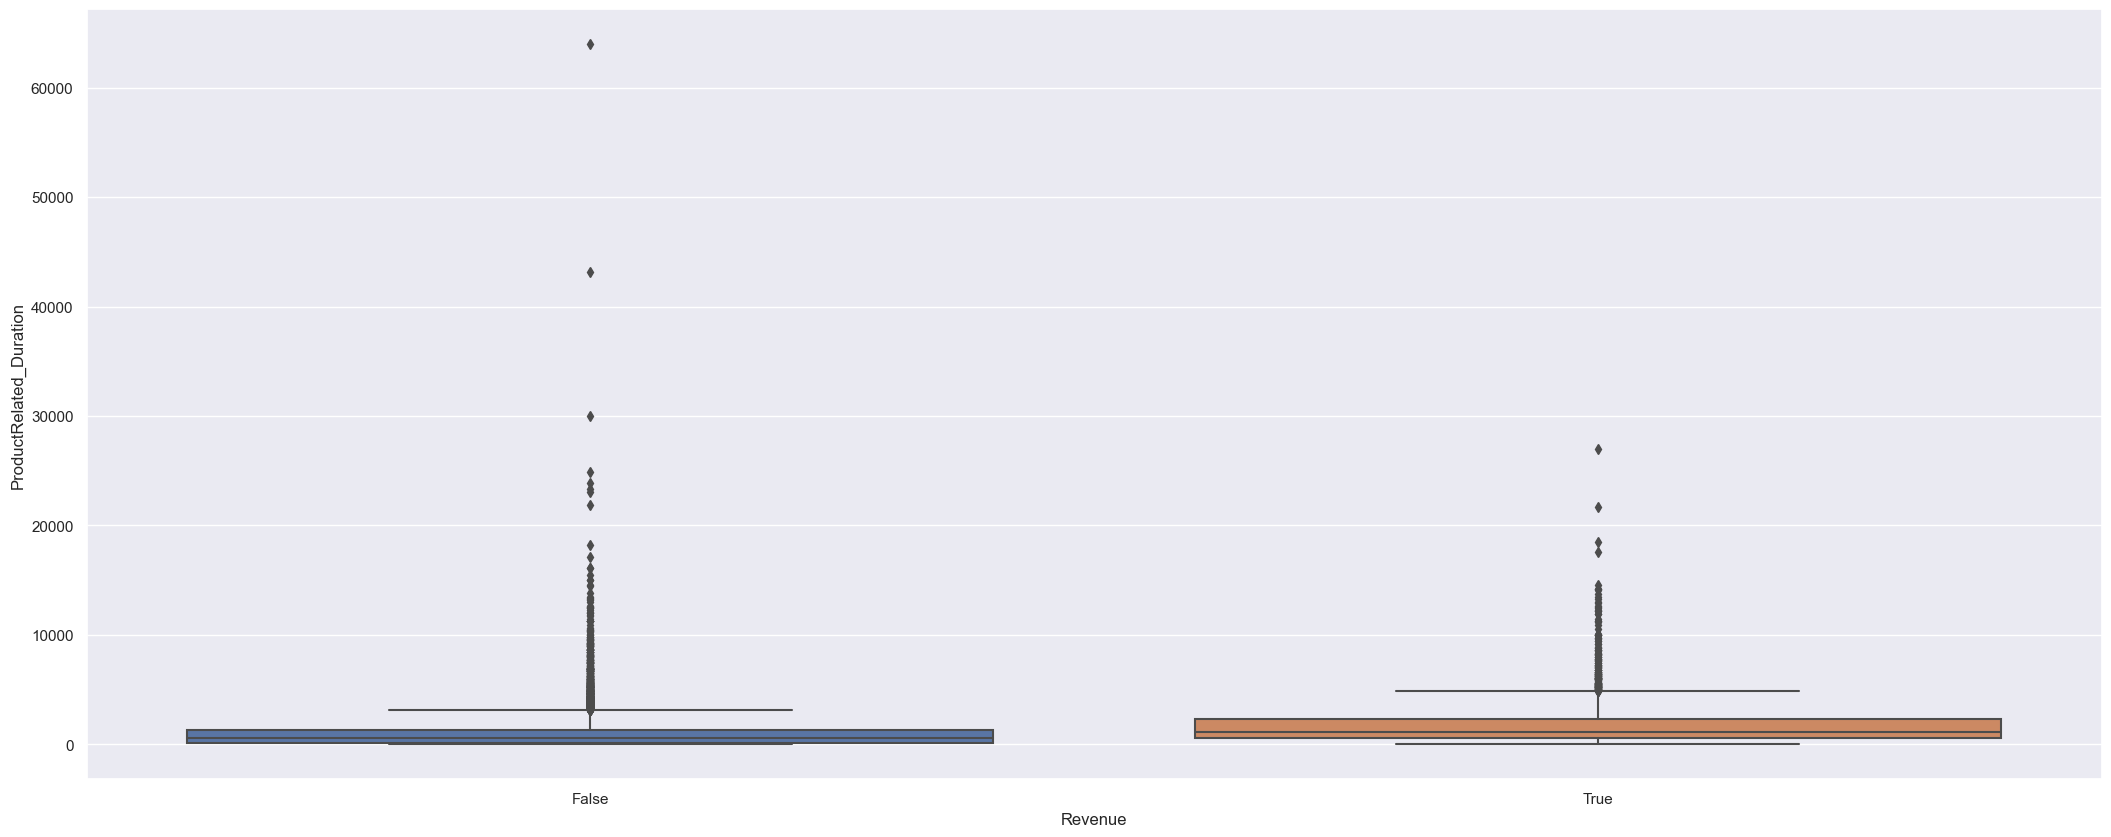

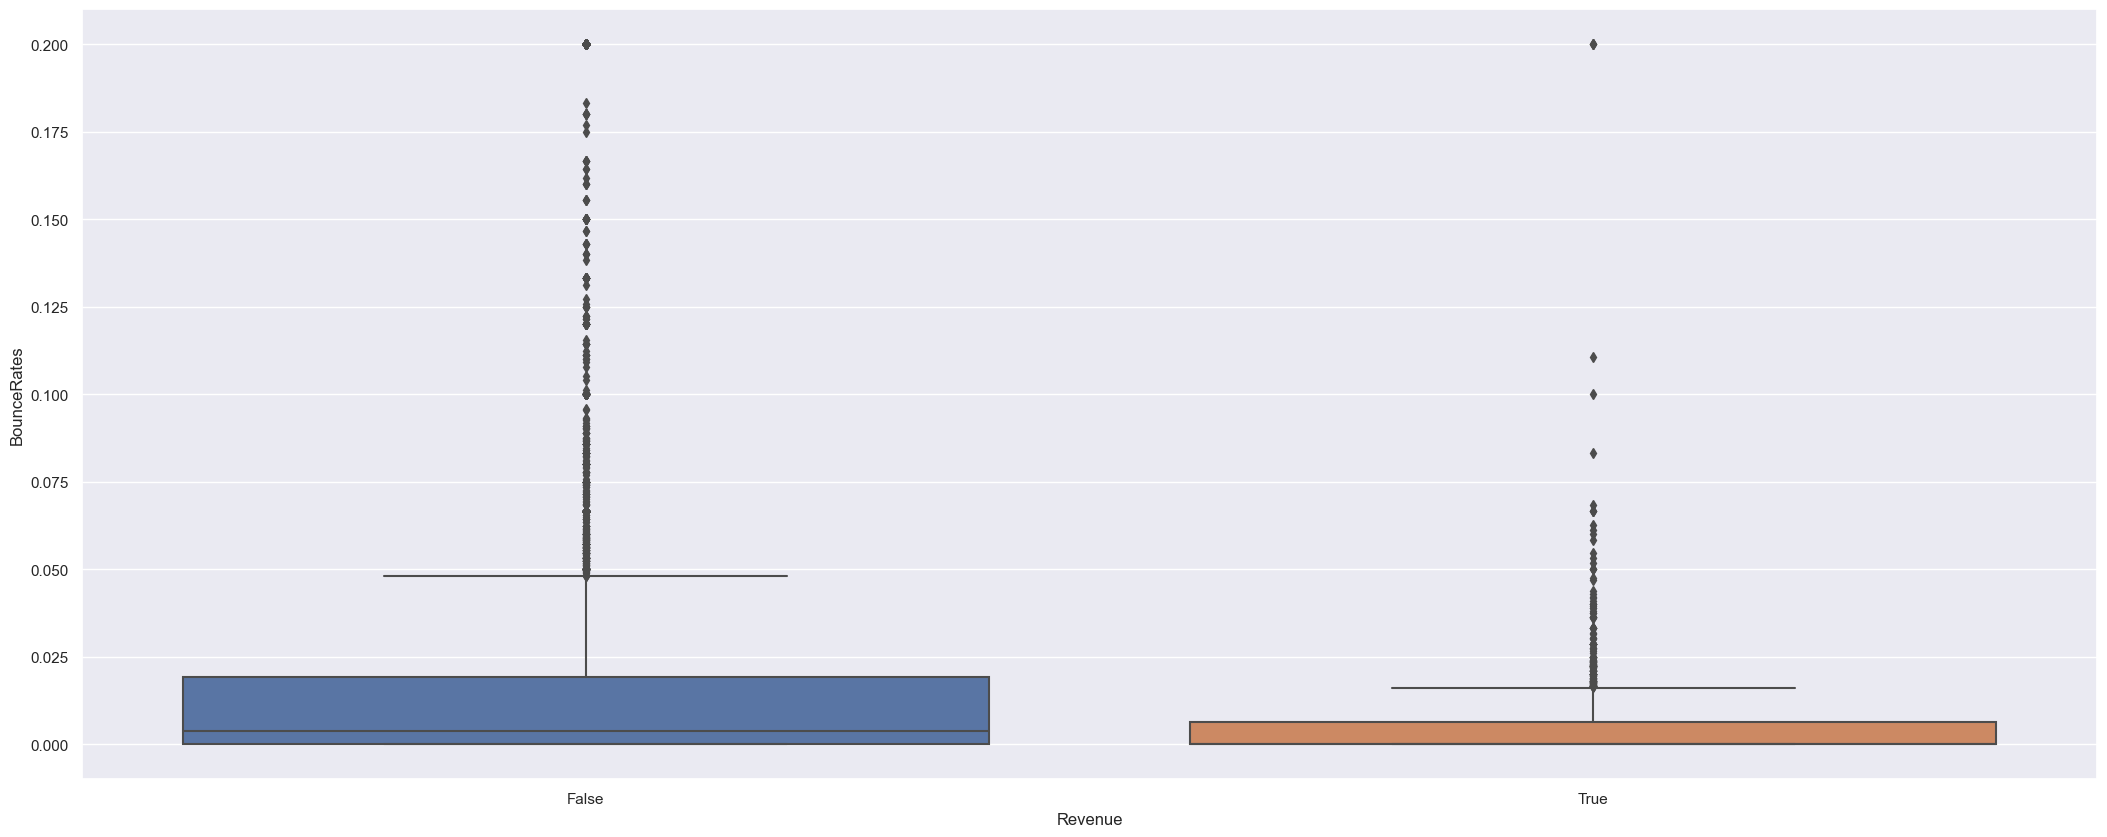

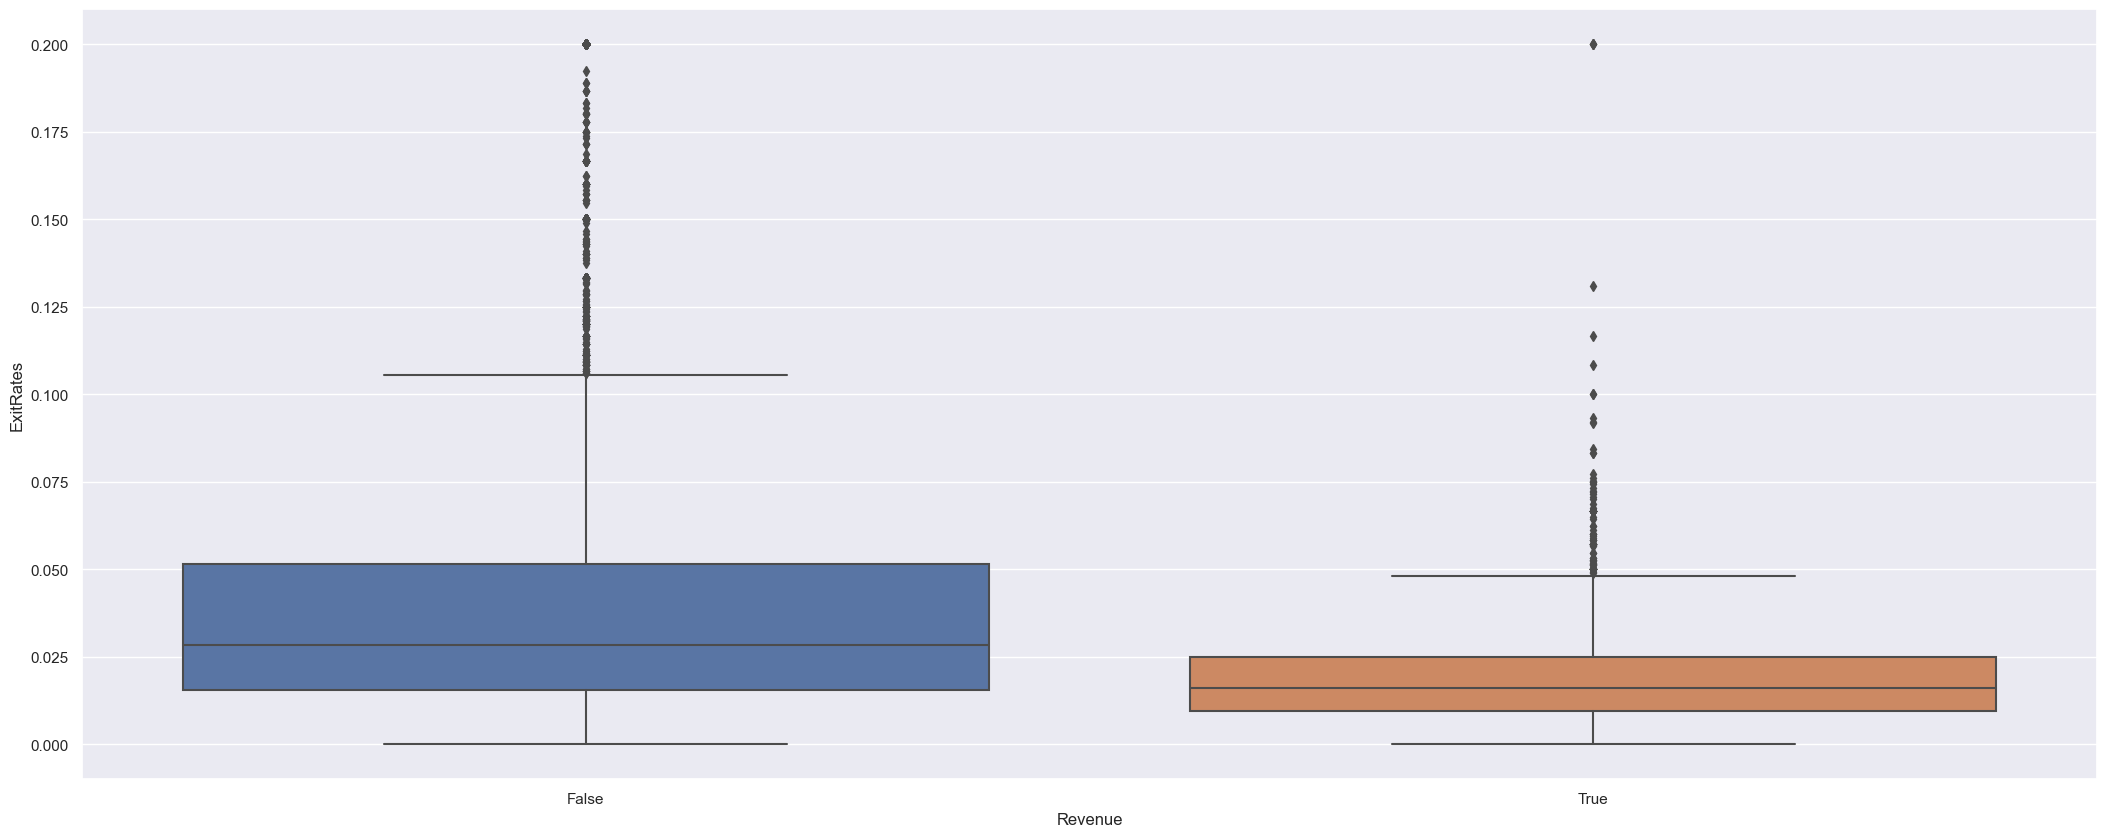

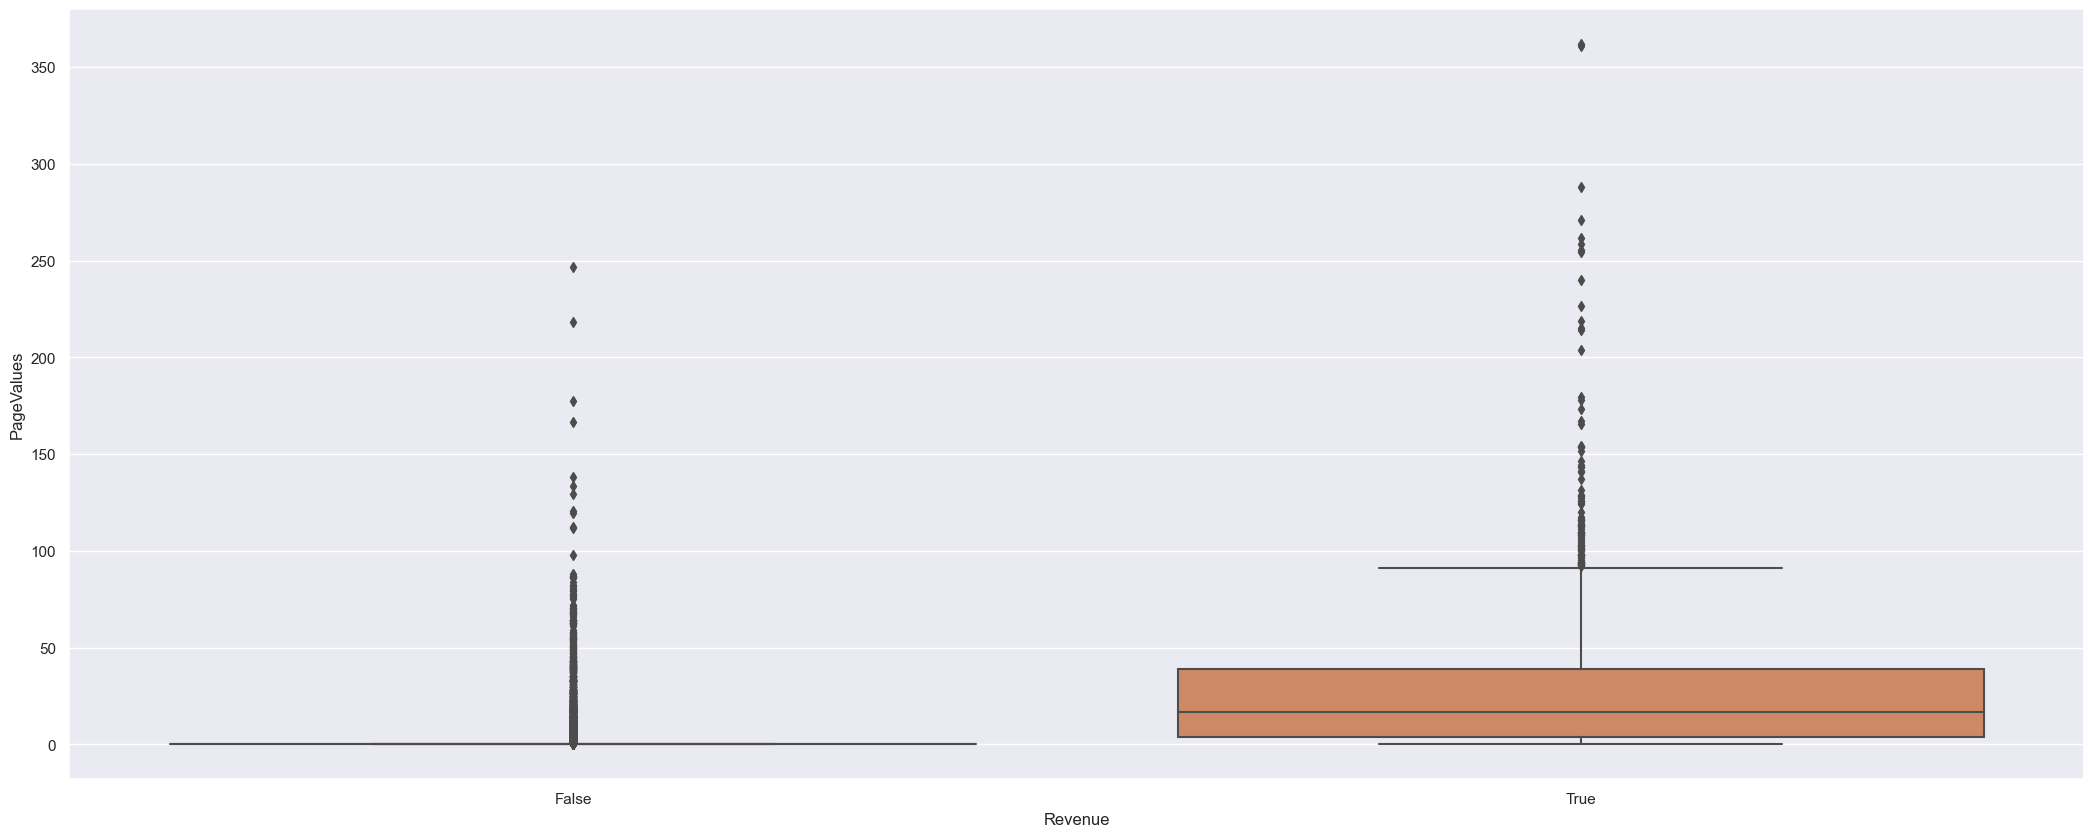

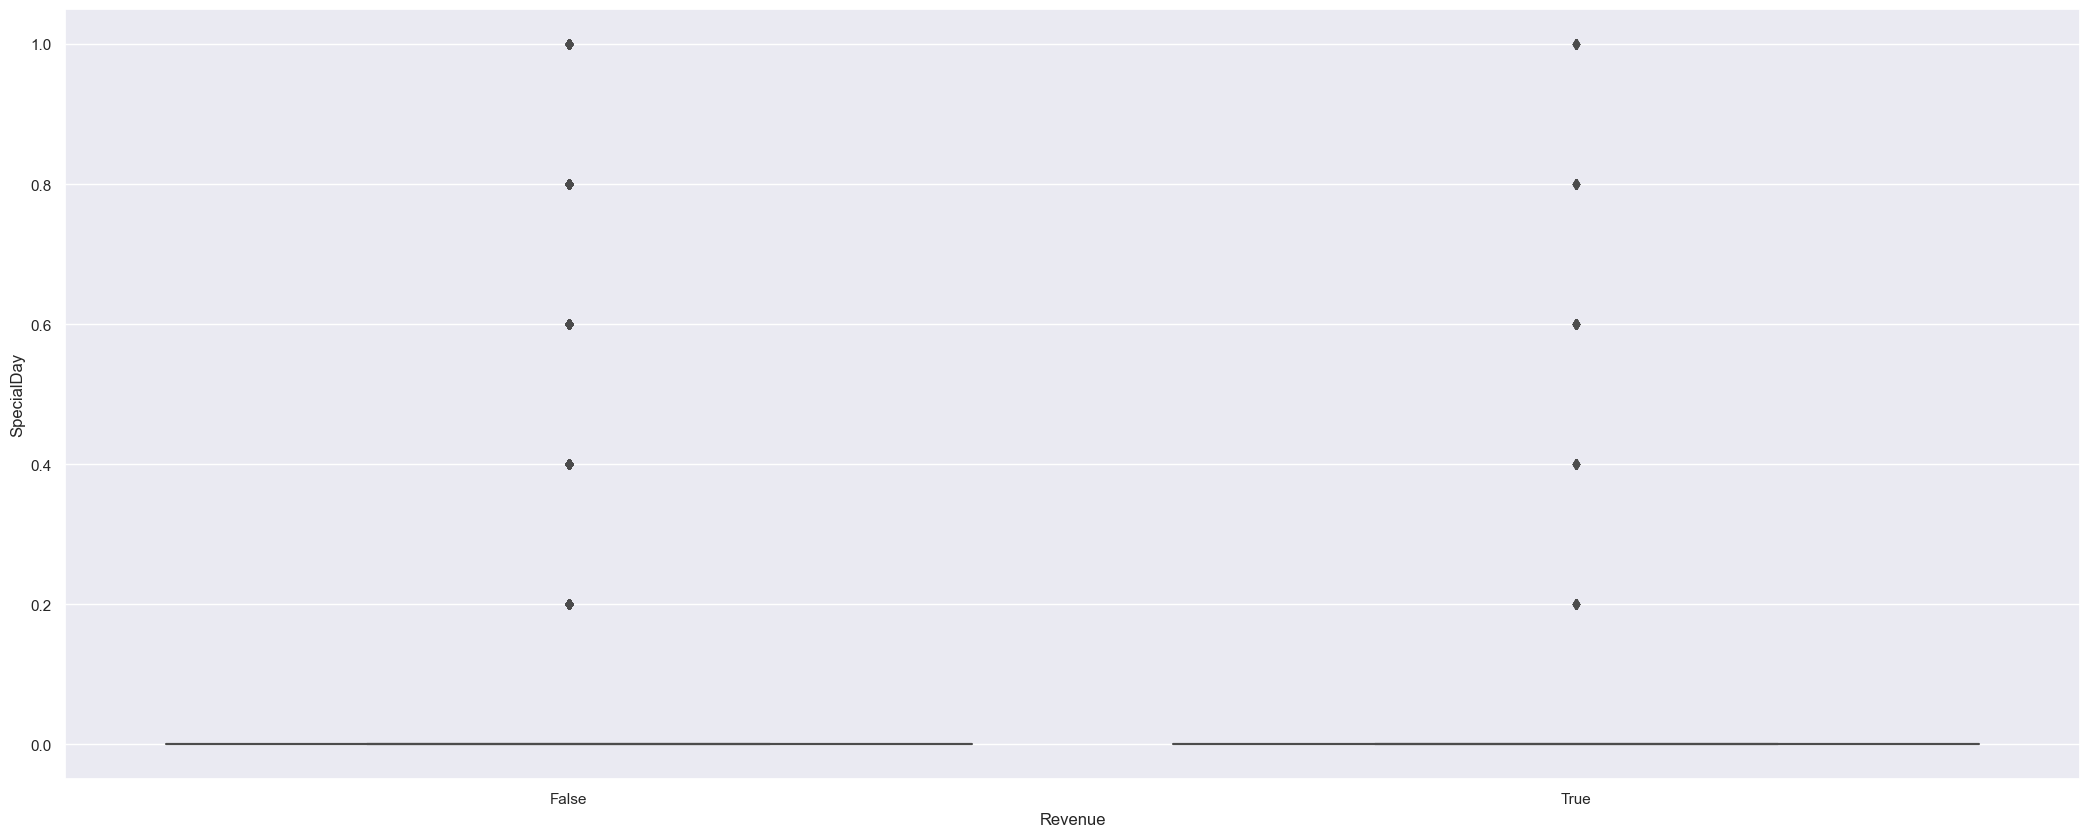

In [96]:
for col_name in numerical_features:
    print('For {} Feature'.format(col_name))
    plt.subplots(figsize=(26,10))
    sns.boxplot(x='Revenue',y=col_name,data=df)
    group_1=df.loc[df.Revenue==True,col_name]
    group_2=df.loc[df.Revenue==False,col_name]
    print('\t'+str(mannwhitneyu(group_1,group_2)))
    print('Point Biseral Test Result')
    print('\t'+str(pointbiserialr(df.loc[:,col_name],df.Revenue)))

<AxesSubplot: >

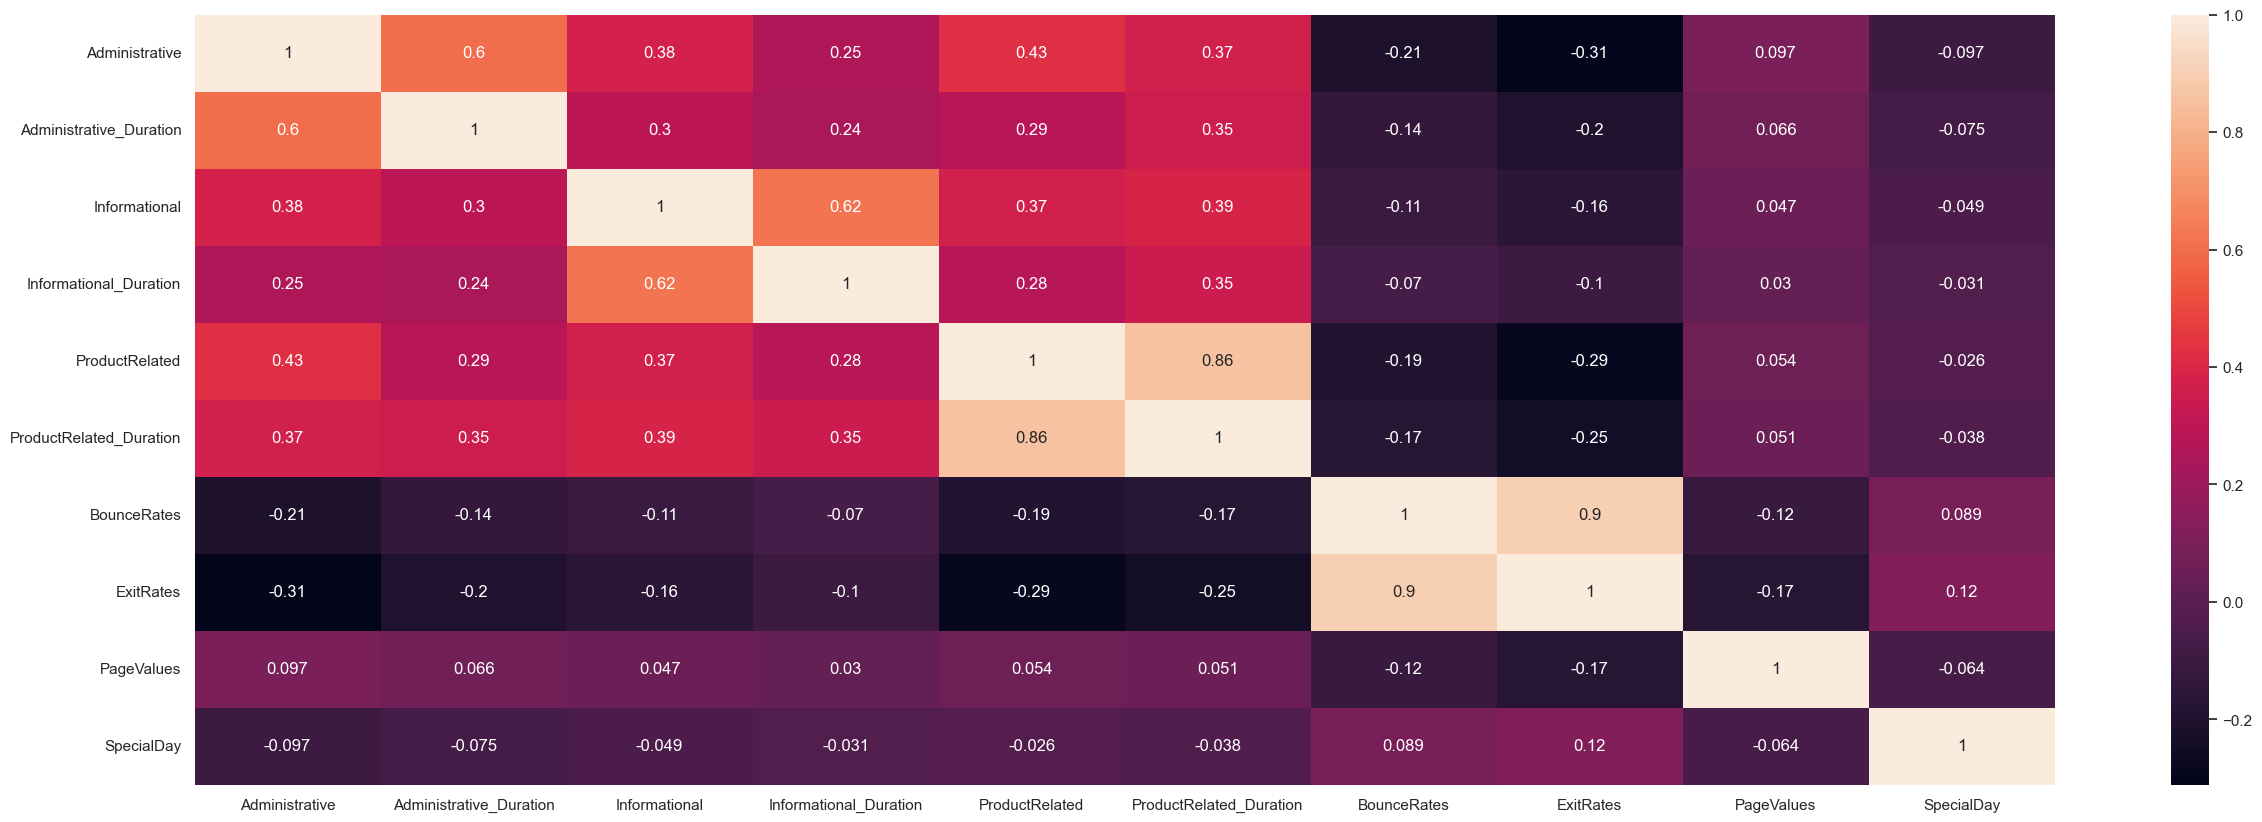

In [97]:
plt.figure(figsize=(30,10))
sns.heatmap(df.loc[:,numerical_features].corr(),annot=True)

In [98]:
# BounceRate~ExitRate
# Administrative~Adm_duration
# informal~informal_dur
# prodrela~prodrela_duration

In [99]:
alpha=0.05
for month_name in categorical_features:
    print('Feature',month_name)
    chi_square=0
    rows=df[month_name].unique()
    columns=df['Revenue'].unique()
    data_crosstab=pd.crosstab(df[month_name],df['Revenue'],margins=True,margins_name='Total' )
    for i in columns:
        for j in rows:
            O=data_crosstab[i][j]
            E=data_crosstab[i]['Total']*data_crosstab['Total'][j]/data_crosstab['Total']['Total']
            chi_square+=(O-E)**2/E
    p_value=1-stats.norm.cdf(chi_square,(len(rows)-1)*(len(columns)-1))
    conclusion="Failed to reject the null hypothesis."
    if p_value<=alpha:
        conclusion="Null Hypothesis is rejected."
    print("chisquare-score is:",chi_square," and p value is:",p_value)
    print(conclusion)


Feature Month
chisquare-score is: 376.2798173530948  and p value is: 0.0
Null Hypothesis is rejected.
Feature OperatingSystems
chisquare-score is: 75.06993069489529  and p value is: 0.0
Null Hypothesis is rejected.
Feature Browser
chisquare-score is: 29.11898706855977  and p value is: 0.0
Null Hypothesis is rejected.
Feature Region
chisquare-score is: 9.679351489812257  and p value is: 0.04654178078191962
Null Hypothesis is rejected.
Feature TrafficType
chisquare-score is: 359.2248368548344  and p value is: 0.0
Null Hypothesis is rejected.
Feature VisitorType
chisquare-score is: 130.66762667570265  and p value is: 0.0
Null Hypothesis is rejected.
Feature Weekend
chisquare-score is: 9.38421446592373  and p value is: 0.0
Null Hypothesis is rejected.
Feature Revenue
chisquare-score is: 12205.000000000004  and p value is: 0.0
Null Hypothesis is rejected.


In [100]:
categ_data=df.loc[:,categorical_features]
categ_data.head()
categ_data.nunique()
categ_data

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,Feb,1,1,1,1,Returning_Visitor,False,False
1,Feb,2,2,1,2,Returning_Visitor,False,False
2,Feb,4,1,9,3,Returning_Visitor,False,False
3,Feb,3,2,2,4,Returning_Visitor,False,False
4,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...
12200,Dec,4,6,1,1,Returning_Visitor,True,False
12201,Nov,3,2,1,8,Returning_Visitor,True,False
12202,Nov,3,2,1,13,Returning_Visitor,True,False
12203,Nov,2,2,3,11,Returning_Visitor,False,False


In [101]:
df.loc[:,'OperatingSystems']=df.OperatingSystems.astype('category')
df.loc[:,'Browser']=df.Browser.astype('category')
df.loc[:,'Region']=df.Browser.astype('category')
df.loc[:,'TrafficType']=df.Browser.astype('category')
df.loc[:,'VisitorType']=df.Browser.astype('category')
df.loc[:,'Weekend']=df.Browser.astype('category')
df.loc[:,'Month']=df.Browser.astype('category')

/var/folders/bk/wd61j7497814w6tb3q7m4tyh0000gn/T/ipykernel_4810/1292256720.py:5: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

/var/folders/bk/wd61j7497814w6tb3q7m4tyh0000gn/T/ipykernel_4810/1292256720.py:7: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [102]:
categorical_features

['Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Revenue']

In [109]:
categ_data=pd.concat([pd.get_dummies(df.loc[:,categorical_features[:-1]]),df.loc[:,"Revenue"]],axis=1)

In [110]:
categ_data

,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,...,Weekend_5,Weekend_6,Weekend_7,Weekend_8,Weekend_9,Weekend_10,Weekend_11,Weekend_12,Weekend_13,Revenue
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,False
12201,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
12202,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
12203,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False


In [111]:
mod_categ=RandomForestClassifier()
mod_categ.fit(categ_data.drop('Revenue',axis=1),categ_data.Revenue)

RandomForestClassifier()

In [112]:
for x,y in zip(categ_data.drop('Revenue',axis=1).columns,mod_categ.feature_importances_):
    print(x,y)

Month_1 0.017829581393679877
Month_2 0.0069900568592265455
Month_3 0.009578721729776106
Month_4 0.008036818072563442
Month_5 0.00570561789915729
Month_6 0.0025511936190447193
Month_7 0.003346506827762386
Month_8 0.0009655119460435886
Month_9 2.3259215341459893e-05
Month_10 0.003200606197510869
Month_11 0.0006484937213143404
Month_12 0.005846020355073809
Month_13 0.007947906228953142
OperatingSystems_1 0.048886146446595564
OperatingSystems_2 0.2163674047890002
OperatingSystems_3 0.22399568828969676
OperatingSystems_4 0.04981791898997737
OperatingSystems_5 0.0010787589256161835
OperatingSystems_6 0.01052185279163439
OperatingSystems_7 0.009369830625199157
OperatingSystems_8 0.022244627630250514
Browser_1 0.006048188605465937
Browser_2 0.005759546703554902
Browser_3 0.007856527110904633
Browser_4 0.009455293826077413
Browser_5 0.005847962857043197
Browser_6 0.006651405730575041
Browser_7 0.002611218657843411
Browser_8 0.0007178838203604281
Browser_9 0.00011780954045997531
Browser_10 0.001

In [107]:
numerical_features

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay']

# BounceRate~ExitRate
# Administrative~Adm_duration
# informal~informal_dur
# prodrela~prodrela_duration

In [136]:
final_data=pd.concat([categ_data.loc[:,['OperatingSystems_2','OperatingSystems_3','VisitorType_9','Weekend_9','Month_9','Browser_9','TrafficType_9']],df.loc[:,['Administrative','Informational','ExitRates','PageValues','ProductRelated','SpecialDay','Revenue']]],axis=1)
final_data.head()


,OperatingSystems_2,OperatingSystems_3,VisitorType_9,Weekend_9,Month_9,Browser_9,TrafficType_9,Administrative,Informational,ExitRates,PageValues,ProductRelated,SpecialDay,Revenue
0,0,0,0,0,0,0,0,0,0,0.20,0.0,1,0.0,False
1,1,0,0,0,0,0,0,0,0,0.10,0.0,2,0.0,False
2,0,0,0,0,0,0,0,0,0,0.20,0.0,1,0.0,False
3,0,1,0,0,0,0,0,0,0,0.14,0.0,2,0.0,False
4,0,1,0,0,0,0,0,0,0,0.05,0.0,10,0.0,False


In [137]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(final_data.drop('Revenue',axis=1),final_data.Revenue,test_size=0.2,random_state=42)

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
mod_class=LogisticRegression(max_iter=1000)
mod_class.fit(X_train,y_train)
pred=mod_class.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       False       0.89      0.98      0.93      2079
        True       0.72      0.34      0.46       362

    accuracy                           0.88      2441
   macro avg       0.81      0.66      0.70      2441
weighted avg       0.87      0.88      0.86      2441



In [139]:
def print_metrics_by_model(model,x_test,y_test):
    print('Accuracy_Score',accuracy_score(y_test,model.predict(x_test)))
    print('Confusion Matrix')
    print(pd.crosstab(y_test,model.predict(x_test),rownames=['Actual'],colnames=['Predicted']))
    print("Classification Report")
    print(classification_report(y_test,model.predict(x_test)))
from sklearn.model_selection import GridSearchCV 
mod_log=LogisticRegression(max_iter=3000,C=1,penalty='l2',class_weight='balanced')
mod_log.fit(X_train,y_train)
print_metrics_by_model(mod_log,X_test,y_test)

Accuracy_Score 0.8697255223269152
Confusion Matrix
Predicted  False  True 
Actual                 
False       1863    216
True         102    260
Classification Report
              precision    recall  f1-score   support

       False       0.95      0.90      0.92      2079
        True       0.55      0.72      0.62       362

    accuracy                           0.87      2441
   macro avg       0.75      0.81      0.77      2441
weighted avg       0.89      0.87      0.88      2441



In [140]:
def my_custom_loss_func(y_true,y_pred):
    print('Confusion Matrix on Cross Validation Set')
    print(pd.crosstab(y_true,y_pred,rownames=['Actual'],colnames=['Predicted'],margins=True))
    return f1_score(y_true,y_pred)
parameters={'solver':['liblinear','lbfgs'],"C":[0.001,0.01,0.1,1]}
mod_log=LogisticRegression(max_iter=3000,class_weight='balanced')
clf=GridSearchCV(mod_log,parameters,verbose=3)
clf.fit(X_train,y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .........C=0.001, solver=liblinear;, score=0.881 total time=   0.0s
[CV 2/5] END .........C=0.001, solver=liblinear;, score=0.874 total time=   0.0s
[CV 3/5] END .........C=0.001, solver=liblinear;, score=0.866 total time=   0.0s
[CV 4/5] END .........C=0.001, solver=liblinear;, score=0.865 total time=   0.0s
[CV 5/5] END .........C=0.001, solver=liblinear;, score=0.889 total time=   0.0s
[CV 1/5] END .............C=0.001, solver=lbfgs;, score=0.871 total time=   0.0s
[CV 2/5] END .............C=0.001, solver=lbfgs;, score=0.874 total time=   0.0s
[CV 3/5] END .............C=0.001, solver=lbfgs;, score=0.869 total time=   0.0s
[CV 4/5] END .............C=0.001, solver=lbfgs;, score=0.865 total time=   0.1s
[CV 5/5] END .............C=0.001, solver=lbfgs;, score=0.886 total time=   0.0s
[CV 1/5] END ..........C=0.01, solver=liblinear;, score=0.872 total time=   0.0s
[CV 2/5] END ..........C=0.01, solver=liblinear;,

GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=3000),
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'solver': ['liblinear', 'lbfgs']},
             verbose=3)

In [141]:
print(accuracy_score(y_test,clf.best_estimator_.predict(X_test)))
print(classification_report(y_test,clf.best_estimator_.predict(X_test)))

0.8746415403523147
              precision    recall  f1-score   support

       False       0.95      0.90      0.92      2079
        True       0.56      0.74      0.64       362

    accuracy                           0.87      2441
   macro avg       0.76      0.82      0.78      2441
weighted avg       0.89      0.87      0.88      2441



SGD Classifier(HingeLoss and L2 regularization)

In [142]:
from sklearn.linear_model import SGDClassifier
mod_sgd=SGDClassifier(max_iter=10000,tol=1e-3,random_state=42)
mod_sgd.fit(X_train,y_train)
print_metrics_by_model(mod_sgd,X_test,y_test)


Accuracy_Score 0.8213846784104875
Confusion Matrix
Predicted  False  True 
Actual                 
False       1725    354
True          82    280
Classification Report
              precision    recall  f1-score   support

       False       0.95      0.83      0.89      2079
        True       0.44      0.77      0.56       362

    accuracy                           0.82      2441
   macro avg       0.70      0.80      0.73      2441
weighted avg       0.88      0.82      0.84      2441



In [144]:
from sklearn.ensemble import RandomForestClassifier
mod_forest=RandomForestClassifier(class_weight='balanced')
mod_forest.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [145]:
print_metrics_by_model(mod_forest,X_test,y_test)

Accuracy_Score 0.8914379352724293
Confusion Matrix
Predicted  False  True 
Actual                 
False       1987     92
True         173    189
Classification Report
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      2079
        True       0.67      0.52      0.59       362

    accuracy                           0.89      2441
   macro avg       0.80      0.74      0.76      2441
weighted avg       0.88      0.89      0.89      2441



In [146]:
import xgboost as xgb
D_train=xgb.DMatrix(data=X_train,label=y_train)
D_test=xgb.DMatrix(data=X_test,label=y_test)
param={'eta':0.3,'max_depth':3,'objective':'multi:softprob','num_class':2}
steps=20# The number of training iterations
model=xgb.train(param,D_train,steps)
preds=model.predict(D_test)

In [147]:
best_preds=np.asarray([np.argmax(line) for line in preds])

In [148]:
print(classification_report(y_test.map({True:1,False:0}),best_preds))
accuracy_score(y_test.map({True:1,False:0}),best_preds)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2079
           1       0.71      0.54      0.61       362

    accuracy                           0.90      2441
   macro avg       0.81      0.75      0.78      2441
weighted avg       0.89      0.90      0.89      2441



0.8984022941417452

In [149]:
classifier=MLPClassifier(hidden_layer_sizes=(512,256,128,64),max_iter=300,activation='relu',solver='adam',random_state=1)

In [150]:
classifier.fit(X_train,y_train)

/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



MLPClassifier(hidden_layer_sizes=(512, 256, 128, 64), max_iter=300,
              random_state=1)

In [151]:
mlp_pred=classifier.predict(X_test)

In [152]:
print(classification_report(y_test,mlp_pred))
print(accuracy_score(y_test,mlp_pred))

              precision    recall  f1-score   support

       False       0.92      0.94      0.93      2079
        True       0.59      0.53      0.56       362

    accuracy                           0.88      2441
   macro avg       0.76      0.73      0.74      2441
weighted avg       0.87      0.88      0.87      2441

0.8762802130274477


In [153]:
pd.concat([pd.Series(mod_forest.feature_names_in_),pd.Series(mod_forest.feature_importances_)],axis=1).sort_values(by=1,ascending=False)
sorted(zip(mod_forest.feature_importances_,mod_forest.feature_names_in_),reverse=True)

[(0.46701456477306064, 'PageValues'),
 (0.21210907025242098, 'ExitRates'),
 (0.17310638366117367, 'ProductRelated'),
 (0.08129247874056209, 'Administrative'),
 (0.03461652547609974, 'Informational'),
 (0.014432315734506092, 'SpecialDay'),
 (0.009276114797970135, 'OperatingSystems_2'),
 (0.008141661998681802, 'OperatingSystems_3'),
 (5.711573796950159e-06, 'Browser_9'),
 (2.188837564907013e-06, 'TrafficType_9'),
 (2.0928926056081032e-06, 'Weekend_9'),
 (6.218318892034374e-07, 'VisitorType_9'),
 (2.6942966820763844e-07, 'Month_9')]

Kernel based SVM's

In [154]:
best_model=SVC(kernel='linear',class_weight='balanced')
best_model.fit(X_train,y_train)
print_metrics_by_model(best_model,X_test,y_test)

Accuracy_Score 0.8783285538713642
Confusion Matrix
Predicted  False  True 
Actual                 
False       1885    194
True         103    259
Classification Report
              precision    recall  f1-score   support

       False       0.95      0.91      0.93      2079
        True       0.57      0.72      0.64       362

    accuracy                           0.88      2441
   macro avg       0.76      0.81      0.78      2441
weighted avg       0.89      0.88      0.88      2441



In [155]:
best_model=SVC(kernel='poly',class_weight='balanced')
best_model.fit(X_train,y_train)
print_metrics_by_model(best_model,X_test,y_test)

Accuracy_Score 0.8758705448586644
Confusion Matrix
Predicted  False  True 
Actual                 
False       1989     90
True         213    149
Classification Report
              precision    recall  f1-score   support

       False       0.90      0.96      0.93      2079
        True       0.62      0.41      0.50       362

    accuracy                           0.88      2441
   macro avg       0.76      0.68      0.71      2441
weighted avg       0.86      0.88      0.86      2441



In [156]:
best_model=SVC(kernel='rbf')
best_model.fit(X_train,y_train)
print_metrics_by_model(best_model,X_test,y_test)

Accuracy_Score 0.8922572716099959
Confusion Matrix
Predicted  False  True 
Actual                 
False       2003     76
True         187    175
Classification Report
              precision    recall  f1-score   support

       False       0.91      0.96      0.94      2079
        True       0.70      0.48      0.57       362

    accuracy                           0.89      2441
   macro avg       0.81      0.72      0.75      2441
weighted avg       0.88      0.89      0.88      2441



In [157]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
model=GaussianProcessClassifier()
model.fit(X_train,y_train)

GaussianProcessClassifier()

In [158]:
model.predict(X_test)
print_metrics_by_model(model,X_test,y_test)

Accuracy_Score 0.8750512085210979
Confusion Matrix
Predicted  False  True 
Actual                 
False       1956    123
True         182    180
Classification Report
              precision    recall  f1-score   support

       False       0.91      0.94      0.93      2079
        True       0.59      0.50      0.54       362

    accuracy                           0.88      2441
   macro avg       0.75      0.72      0.73      2441
weighted avg       0.87      0.88      0.87      2441



Stacking Ensemble

In [160]:
X_tr,X_val,y_tr,y_val=train_test_split(X_train,y_train)
random_forest_clf=RandomForestClassifier(n_estimators=100,random_state=42)
extra_trees_clf=ExtraTreesClassifier(n_estimators=100,random_state=42)
svm_clf=LinearSVC(max_iter=100,tol=20,random_state=42)
mlp_clf=MLPClassifier(random_state=42)
estimators=[random_forest_clf,extra_trees_clf,svm_clf,mlp_clf]
for estimator in estimators:
    print("Training the",estimator)
    estimator.fit(X_tr,y_tr)
X_val_predictions=np.empty((len(X_val),len(estimators)),dtype=np.float32)
for index,estimator in enumerate(estimators):
    X_val_predictions[:,index]=estimator.predict(X_val)

Training the RandomForestClassifier(random_state=42)
Training the ExtraTreesClassifier(random_state=42)
Training the LinearSVC(max_iter=100, random_state=42, tol=20)
Training the MLPClassifier(random_state=42)


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [161]:
rnd_forest_blender=RandomForestClassifier(n_estimators=200,oob_score=True,random_state=42)
rnd_forest_blender.fit(X_val_predictions,y_val)


RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)

In [162]:
rnd_forest_blender.oob_score_

0.8959442851290454

In [163]:
X_test_predictions=np.empty((len(X_test),len(estimators)),dtype=np.float32)
for index,estimator in enumerate(estimators):
    X_test_predictions[:,index]=estimator.predict(X_test)
y_pred=rnd_forest_blender.predict(X_test_predictions)

In [164]:
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

       False       0.92      0.95      0.94      2079
        True       0.65      0.53      0.59       362

    accuracy                           0.89      2441
   macro avg       0.79      0.74      0.76      2441
weighted avg       0.88      0.89      0.88      2441



array([[1975,  104],
       [ 169,  193]])

In [165]:
random_forest_clf.feature_importances_

array([1.06482209e-02, 7.79829720e-03, 2.42903899e-06, 6.43833056e-07,
       7.80102950e-07, 1.05227987e-06, 2.27167570e-06, 9.06008369e-02,
       3.88303194e-02, 2.10828557e-01, 4.60837068e-01, 1.69782513e-01,
       1.06670110e-02])

In [166]:
sorted(zip(random_forest_clf.feature_importances_,random_forest_clf.feature_names_in_),reverse=True)

[(0.4608370682108472, 'PageValues'),
 (0.210828556769882, 'ExitRates'),
 (0.1697825127468715, 'ProductRelated'),
 (0.09060083687410352, 'Administrative'),
 (0.03883031937291683, 'Informational'),
 (0.010667011002306413, 'SpecialDay'),
 (0.010648220892198442, 'OperatingSystems_2'),
 (0.007798297200300365, 'OperatingSystems_3'),
 (2.429038993249612e-06, 'VisitorType_9'),
 (2.2716757039156022e-06, 'TrafficType_9'),
 (1.052279870464865e-06, 'Browser_9'),
 (7.801029504323696e-07, 'Month_9'),
 (6.438330557005213e-07, 'Weekend_9')]